In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset

data = pd.read_csv("Housing_1.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
# Check for missing value

data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
# Check for duplicate row

data.duplicated().sum()

0

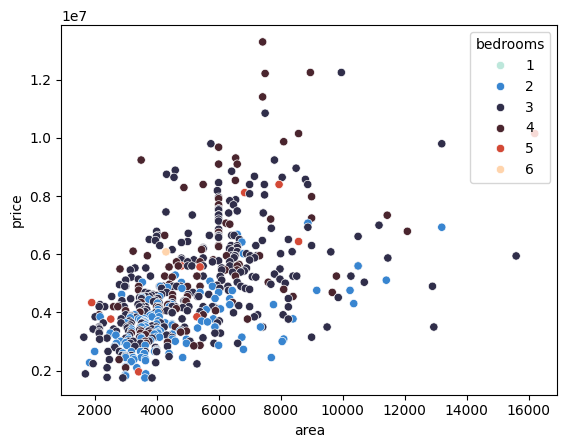

In [7]:
sns.scatterplot(x=data['area'], y=data['price'], hue=data['bedrooms'], palette='icefire')
plt.show()

In [8]:
ohe = OneHotEncoder(drop='first')

d=data[['furnishingstatus']]
arr=ohe.fit_transform(d).toarray()

column_names = ohe.get_feature_names_out(input_features=['furnishingstatus']).tolist()
df_encoded = pd.DataFrame(arr, columns=column_names)

data['furnishingstatus'] = df_encoded['furnishingstatus_semi-furnished']
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,0.0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,1.0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,0.0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,0.0


In [9]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for column in binary_columns:
    data[column] = data[column].map({'yes':1, 'no':0})
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1.0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0.0


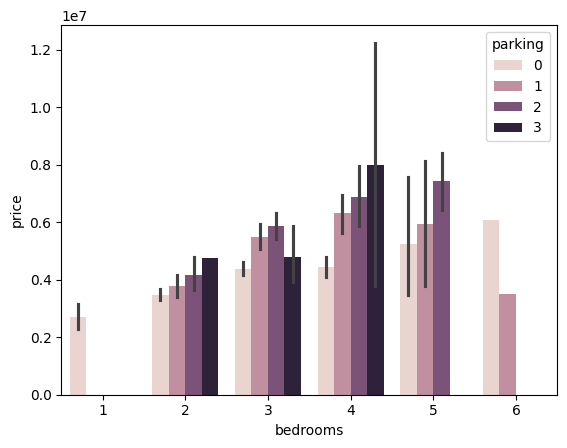

In [10]:
sns.barplot(x=data['bedrooms'], y=data['price'], hue=data['parking'])
plt.show()

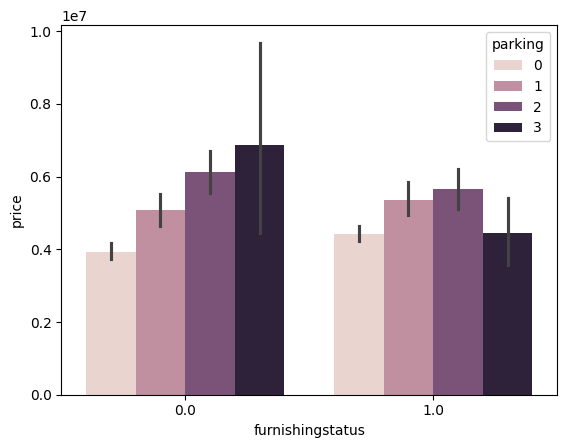

In [11]:
sns.barplot(x=data['furnishingstatus'], y=data['price'], hue=data['parking'])
plt.show()

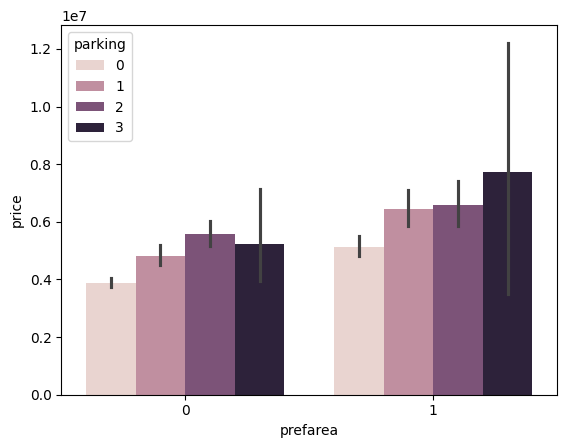

In [12]:
sns.barplot(x=data['prefarea'],y=data['price'],hue=data["parking"])
plt.show()

In [13]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179


In [14]:
x_features = data[['area','bedrooms', 'mainroad', 'basement', 'parking', 'furnishingstatus']]
x_features

,area,bedrooms,mainroad,basement,parking,furnishingstatus
0,7420,4,1,0,2,0.0
1,8960,4,1,0,3,0.0
2,9960,3,1,1,2,1.0
3,7500,4,1,1,3,0.0
4,7420,4,1,1,2,0.0
...,...,...,...,...,...,...
540,3000,2,1,1,2,0.0
541,2400,3,0,0,0,1.0
542,3620,2,1,0,0,0.0
543,2910,3,0,0,0,0.0


In [15]:
y_target=data['price']
y_target

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_features, y_target, test_size=0.2, random_state=42)

In [17]:
x_train

,area,bedrooms,mainroad,basement,parking,furnishingstatus
46,6000,3,1,0,1,0.0
93,7200,3,1,1,3,1.0
335,3816,2,1,1,2,0.0
412,2610,3,1,1,0,0.0
471,3750,3,1,0,0,0.0
...,...,...,...,...,...,...
71,6000,4,1,0,0,0.0
106,5450,4,1,1,0,1.0
270,4500,3,1,0,1,0.0
435,4040,2,1,0,0,0.0


In [18]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [19]:
model = DecisionTreeRegressor(random_state=42)

In [20]:
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [21]:
y_pred=model.predict(x_test)

In [22]:
mae=mean_absolute_error(y_test,y_pred)
mae

1605836.391437309

In [23]:
mse=mean_squared_error(y_test, y_pred)
mse

5145733039500.509

In [24]:
r2 =r2_score(y_test, y_pred)
r2

-0.018035715935777352

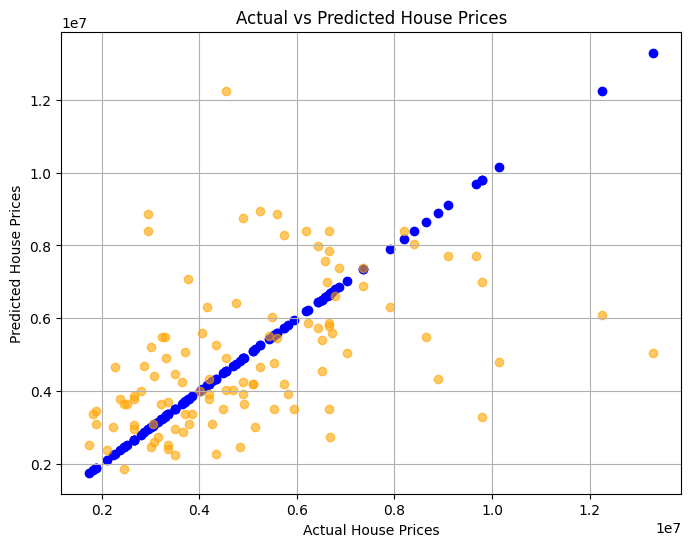

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,color="blue",alpha=1,label="Actual House Prices")
plt.scatter(y_test,y_pred,color="orange",alpha=0.6,label="Predected House Prices")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid()
plt.show()